# Title: Spam Email Classification

<h1 style="font-family: 'poppins'; font-weight: bold; color: white;">👨‍💻Author: Hasnain Yaqoob</h1>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/hasnainyaqub)
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/hasnainyaqooob)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/hasnain-yaqoob-/)  


[![Twitter/X](https://img.shields.io/badge/Twitter-Profile-blue?style=for-the-badge&logo=twitter)](https://twitter.com/Hasnain_Yaqoob_)
[![Facebook](https://img.shields.io/badge/Facebook-Profile-blue?style=for-the-badge&logo=facebook)](https://www.facebook.com/hasnainyaqkoob)
[![TikTok](https://img.shields.io/badge/TikTok-Profile-black?style=for-the-badge&logo=tiktok)](https://www.tiktok.com/@hasnainyaqub)  

[![Instagram](https://img.shields.io/badge/Instagram-Profile-blue?style=for-the-badge&logo=instagram)](https://www.instagram.com/hasnain_yaqub/)
[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mailto:hasnainyaqubakm@gmail.com)

# Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nltk
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB 
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

# Load the dataset

In [3]:
df = pd.read_csv('combined_data.csv')
print(df.shape)
df.head()

(83448, 2)


,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


# 2. EDA

In [4]:
# Data description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [5]:
# lets check for duplicates
df.duplicated().sum()

0

- no duplicates, no null values

In [6]:
# lets print shape of dataframe
print(f'{df.shape[0]} rows and {df.shape[1]} columns')

83448 rows and 2 columns


In [7]:
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [8]:
# lets check that how many of data is spam
df['label'].value_counts()

label
1    43910
0    39538
Name: count, dtype: int64

In [9]:
# Plot pie chart of label distribution
fig = px.pie(df['label'].value_counts().reset_index(name='count').rename(columns={'index': 'label'}),
             values='count', names='label', title='Spam and Ham Data Percentage')
fig.show()

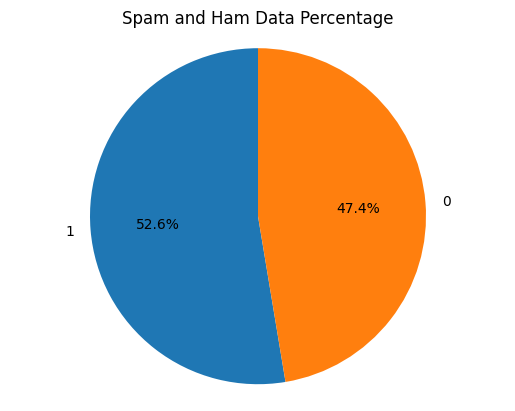

In [10]:
# Plot pie chart of label distribution
df['label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, title='Spam and Ham Data Percentage', ylabel='')
plt.axis('equal')
plt.show()

In [11]:
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [12]:
df.describe()

,label
count,83448.000000
mean,0.526196
std,0.499316
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


#  Data Preprocessing
- lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Lemmatization


In [13]:
import nltk
import string
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import swifter

# Make sure resources are downloaded
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('averaged_perceptron_tagger')

# Initialize once
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Helper: map POS tag to wordnet POS (for better lemmatization)
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)

def transform_text(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens]
    return " ".join(tokens)


/home/dark/miniconda3/envs/dl_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [14]:
transform_text('I loved the youtube lectures on machine learning. How about you?')

'love youtube lecture machine learn'

In [16]:
# df['transformed_text'] = df['text'].swifter.apply(transform_text)

In [17]:
import sys, types, numpy
sys.modules['numpy._core'] = numpy.core
sys.modules['numpy._core.numeric'] = numpy.core.numeric

import pickle
with open("spam_dataset_transformed.pkl", "rb") as f:
    df = pickle.load(f)

In [18]:
df.head()

,label,text,transformed_text
0,1,ounce feather bowl hummingbird opec moment ala...,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...,wulvob get medircations online qnb ikud viagra...
2,0,computer connection from cnn com wednesday es...,computer connection cnn com wednesday escapenu...
3,1,university degree obtain a prosperous future m...,university degree obtain prosperous future mon...
4,0,thanks for all your answers guys i know i shou...,thanks answer guy know checked rsync manual wo...


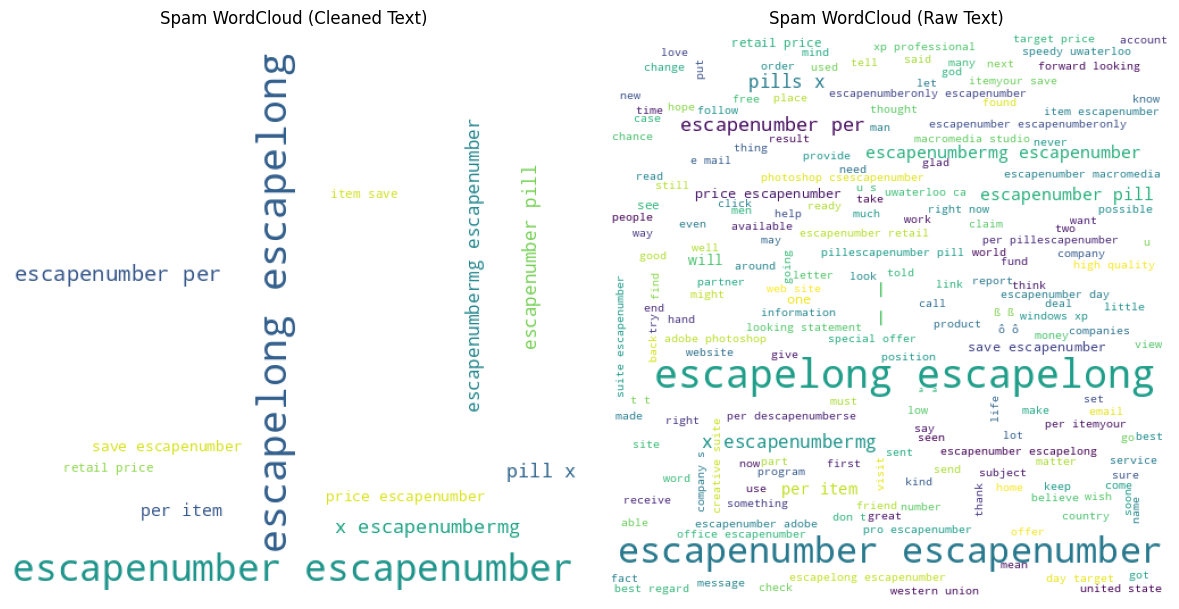

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create both WordClouds
wc_cleaned = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
wc_cleaned.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=' '))

wc_raw = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
wc_raw.generate(df[df['label'] == 1]['text'].str.cat(sep=' '))

# Plot side-by-side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wc_cleaned)
plt.title("Spam WordCloud (Cleaned Text)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wc_raw)
plt.title("Spam WordCloud (Raw Text)")
plt.axis('off')

plt.tight_layout()
plt.show()

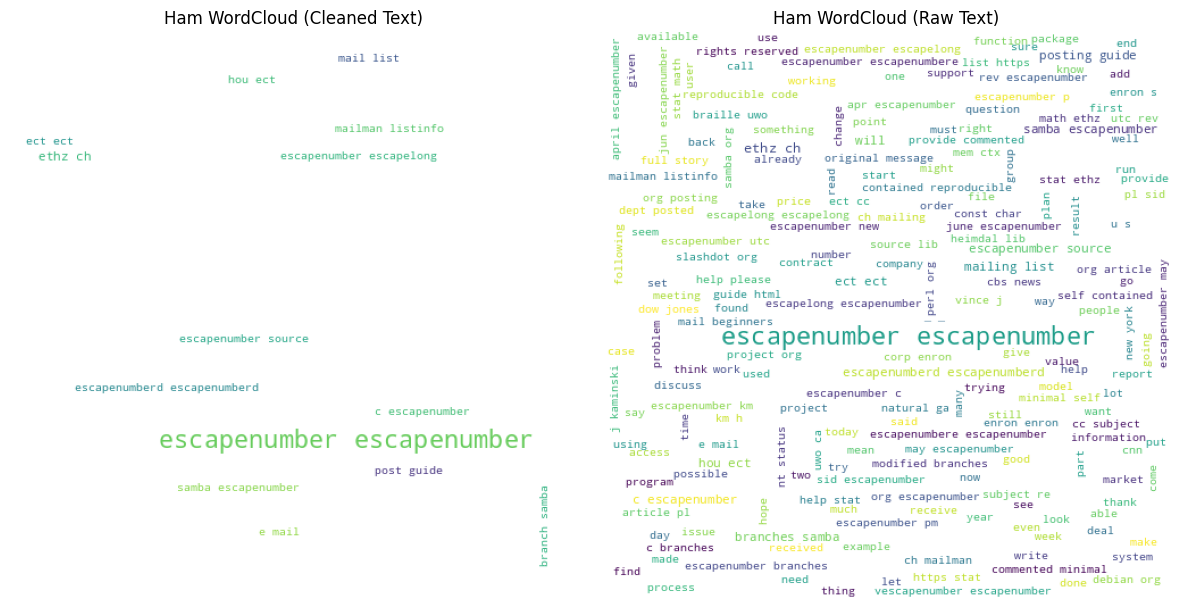

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ham WordCloud from cleaned/stemmed text
wc_cleaned = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
wc_cleaned.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=' '))

# Ham WordCloud from raw/original text
wc_raw = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
wc_raw.generate(df[df['label'] == 0]['text'].str.cat(sep=' '))

# Plot side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wc_cleaned)
plt.title("Ham WordCloud (Cleaned Text)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wc_raw)
plt.title("Ham WordCloud (Raw Text)")
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

ham_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(spam_corpus), len(ham_corpus)

(5516343, 9067901)

In [ ]:
from collections import Counter
import pandas as pd

# Top 30 words in spam
spam_common = Counter(spam_corpus).most_common(30)
spam_df = pd.DataFrame(spam_common, columns=['Spam_Word', 'Spam_Count'])

# Top 30 words in ham
ham_common = Counter(ham_corpus).most_common(30)
ham_df = pd.DataFrame(ham_common, columns=['Ham_Word', 'Ham_Count'])

# Combine side by side
combined_df = pd.concat([spam_df, ham_df], axis=1)
combined_df

,Spam_Word,Spam_Count,Ham_Word,Ham_Count
0,escapenumber,333253,escapenumber,798890
1,escapelong,188114,http,63544
2,com,29014,r,53957
3,http,27851,enron,52858
4,per,26141,c,45443
5,pill,25473,org,42546
6,price,24199,com,40769
7,x,23838,escapelong,39019
8,escapenumbermg,20541,ect,34745
9,company,19984,list,34673


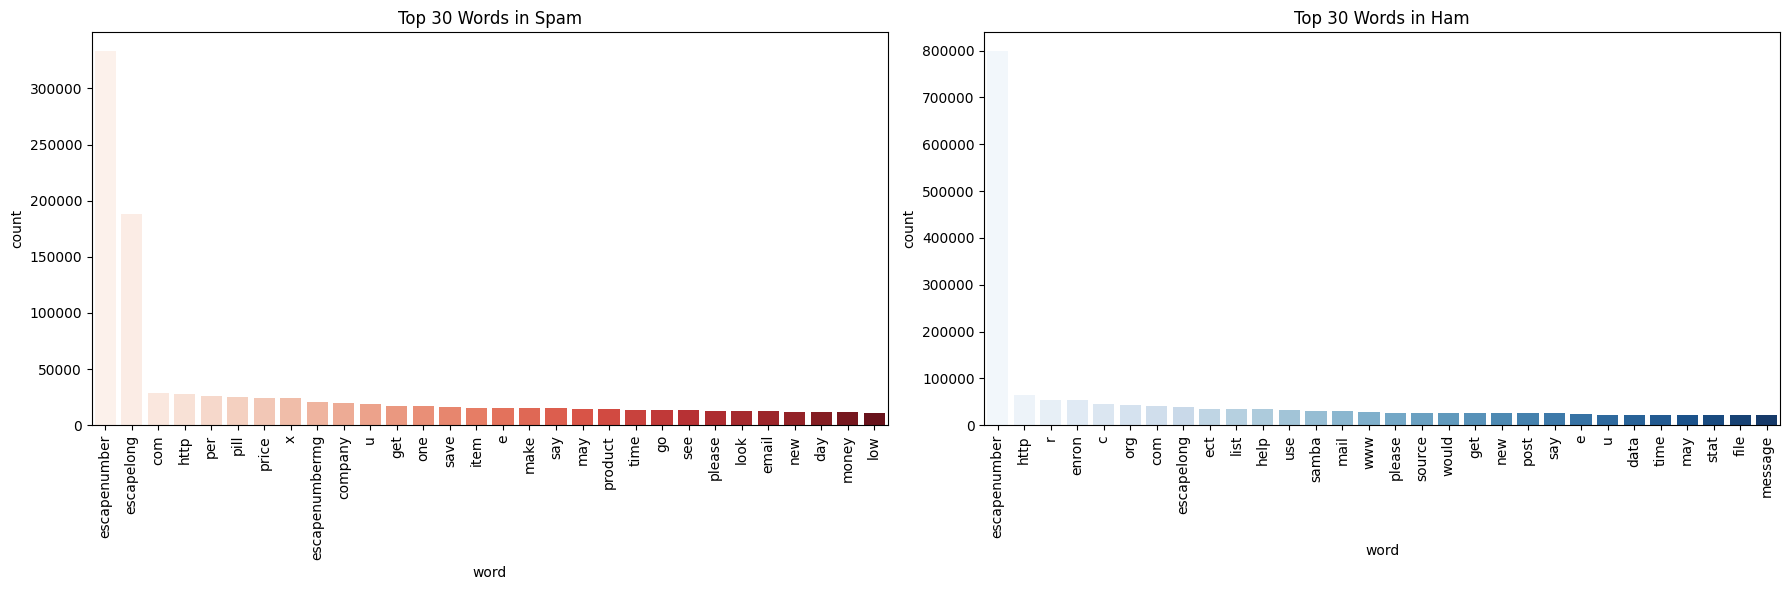

In [ ]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---- Prepare Spam Corpus ----
spam_common_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# ---- Prepare Ham Corpus ----
ham_common_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# ---- Plot side-by-side ----
plt.figure(figsize=(18, 6))  # wider figure

# Plot 1: Spam
plt.subplot(1, 2, 1)
sns.barplot(x='word', y='count', data=spam_common_df, palette='Reds')
plt.title("Top 30 Words in Spam")
plt.xticks(rotation='vertical')

# Plot 2: Ham
plt.subplot(1, 2, 2)
sns.barplot(x='word', y='count', data=ham_common_df, palette='Blues')
plt.title("Top 30 Words in Ham")
plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

# Model Building

In [19]:
# Text Vectorization using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert to dense if needed
if hasattr(X_train, "toarray"):
    X_train = X_train.toarray()
    X_test = X_test.toarray()

# Initialize ETC
model_rndf = RandomForestClassifier(n_estimators=200, random_state=42)

# Train
model_rndf.fit(X_train, y_train)

# Predict
y_pred = model_rndf.predict(X_test)

# Evaluate
print("RandomForestClassifier Results:")
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:   ", recall_score(y_test, y_pred))
print("F1-Score: ", f1_score(y_test, y_pred))

RandomForestClassifier Results:
Accuracy:  0.9871779508687837
Precision: 0.9855550500454959
Recall:    0.9900594149908593
F1-Score:  0.9878020975832194
